## Mounting your google drive

You can use google drive to store and access files e.g. storing and loading data from numpy or CSV files.  
Use the following command to mount your GDrive and access your files.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!pip install ffmpeg
!pip install vtk

  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=9bd161d868ed5745a19258a462b0d0bcb1968e5809289702e723638202ccb96b
  Stored in directory: /root/.cache/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg
     |████████████████████████████████| 59.5 MB 41 kB/s 
     |████████████████████████████████| 3.1 MB 61.2 MB/s 
     |████████████████████████████████| 495 kB 87.6 MB/s 
     |████████████████████████████████| 3.2 MB 63.6 MB/s 
     |████████████████████████████████| 74 kB 3.9 MB/s 
     |████████████████████████████████| 251 kB 83.2 MB/s 
     |████████████████████████████████| 1.3 MB 68.7 MB/s 
     |████████████████████████████████| 294 kB 100.0 MB/s 
     |████████████████████████████████| 142 kB 95.3 MB/s 


In [ ]:
import os
# change the current path. The user can adjust the path depend on the requirement
os.chdir("/content/gdrive/MyDrive/Cola-Notebooks/FYP/YF")
import vtktools

In [ ]:
! /opt/bin/nvidia-smi

Fri Aug 20 12:22:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# !unzip csv_data.zip 

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import numpy.linalg as la
import scipy.linalg as sl
import scipy.sparse.linalg as spl
import matplotlib.pyplot as plt
import torch.nn as nn  # Neural network module
import scipy.sparse as sp
import scipy.optimize as sop
import progressbar
# making slopes
import torch
from torch.utils.data import TensorDataset
import torch.nn.functional as F
from matplotlib.pyplot import LinearLocator
import matplotlib as mpl
import matplotlib.colors as colors


# create an animation
from matplotlib import animation
from IPython.display import HTML

from matplotlib import animation
import math
import ffmpeg

!pip install pycm livelossplot
%pylab inline
from livelossplot import PlotLosses

from torch.utils.data import DataLoader
import torch.utils.data as Data

import time
import platform
print('python version', platform.python_version())
print('torch version', torch.__version__)
print('numpy version', np.version.version)

     |████████████████████████████████| 64 kB 2.8 MB/s 
     |████████████████████████████████| 571 kB 29.1 MB/s 
Populating the interactive namespace from numpy and matplotlib
python version 3.7.11
torch version 1.9.0+cu102
numpy version 1.19.5


In [ ]:
def set_seed(seed):
    """
    Use this to set ALL the random seeds to a fixed value and take out any randomness from cuda kernels
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.benchmark = True  ##uses the inbuilt cudnn auto-tuner to find the fastest convolution algorithms. -
    torch.backends.cudnn.enabled   = True

    return True

device = 'cuda'  # Set out device to GPU

print('Cuda installed, running on GPU!')  # print sentence

Cuda installed, running on GPU!


In [ ]:
# These functions are saved in function.py and the note are also added to that file
def saveIndex(path_train, path_valid, path_test,train_index, valid_index, test_index):
    # save training and validation loss    
    np.savetxt(path_train,train_index, delimiter=',')
    np.savetxt(path_valid,valid_index, delimiter=',')
    np.savetxt(path_test,test_index, delimiter=',')

def getIndex(path_train,path_valid,path_test):
    train_index = np.loadtxt(path_train,delimiter=",")
    valid_index = np.loadtxt(path_valid,delimiter=",")
    test_index = np.loadtxt(path_test,delimiter=",")
    return train_index,valid_index,test_index

def saveMode(path_train, path_valid, path_test,mode_train, mode_valid, mode_test):
    # save training and validation loss    
    np.savetxt(path_train,mode_train.cpu().data.numpy(), delimiter=',')
    np.savetxt(path_valid,mode_valid.cpu().data.numpy(), delimiter=',')
    np.savetxt(path_test,mode_test.cpu().data.numpy(), delimiter=',')

def getMode(path_train,path_valid,path_test):
    mode_train = np.loadtxt(path_train,delimiter=",")
    mode_valid = np.loadtxt(path_valid,delimiter=",")
    mode_test = np.loadtxt(path_test,delimiter=",")
    return mode_train,mode_valid,mode_test

def saveCsv(pathcsv,EPOCH):
    # save training and validation loss
    losses_combined = np.zeros((EPOCH,3))
    losses_combined[:,0] = np.asarray(epoch_list)
    losses_combined[:,1] = np.asarray(loss_list)
    losses_combined[:,2] = np.asarray(loss_valid)
    np.savetxt(pathcsv, losses_combined , delimiter=',')

def PlotMSELoss(pathName,name):
    epoch = pd.read_csv(pathName,usecols=[0]).values
    train_loss = pd.read_csv(pathName,usecols=[1]).values
    val_loss = pd.read_csv(pathName,usecols=[2]).values

    fig = plt.figure(figsize=(10,7))
    axe1 = plt.subplot(111)
    axe1.semilogy(epoch,train_loss,label = "train")
    axe1.plot(epoch,val_loss,label = "valid")
    axe1.legend(loc = "best",fontsize=14)
    axe1.set_xlabel("$epoch$",fontsize=14)
    axe1.set_ylabel("$MSE loss$",fontsize=14)
    axe1.set_title(name,fontsize=14)

def getMSELoss(pathName):
    epoch = pd.read_csv(pathName,usecols=[0]).values
    train_loss = pd.read_csv(pathName,usecols=[1]).values
    val_loss = pd.read_csv(pathName,usecols=[2]).values
    return train_loss,val_loss,epoch

def getTotal_decoded(training_decoded,valid_decoded,test_decoded,train_index,valid_index,test_index):
    total_decoded = np.zeros((nTotal,nNodes,2))
    for i in range(len(train_index)):
        total_decoded[int(train_index[i]),:,0] = training_decoded.cpu().detach().numpy()[i,:,0]
        total_decoded[int(train_index[i]),:,1] = training_decoded.cpu().detach().numpy()[i,:,1]

    for i in range(len(valid_index)):
        total_decoded[int(valid_index[i]),:,0] = valid_decoded.cpu().detach().numpy()[i,:,0]
        total_decoded[int(valid_index[i]),:,1] = valid_decoded.cpu().detach().numpy()[i,:,1]

    for i in range(len(test_index)):
        total_decoded[int(test_index[i]),:,0] = test_decoded.cpu().detach().numpy()[i,:,0]
        total_decoded[int(test_index[i]),:,1] = test_decoded.cpu().detach().numpy()[i,:,1]
    return total_decoded

# def get_clean_vtu(filename):
#     "Removes fields and arrays from a vtk file, leaving the coordinates/connectivity information."
#     vtu_data = vtktools.vtu(filename)
#     clean_vtu = vtktools.vtu()
#     clean_vtu.ugrid.DeepCopy(vtu_data.ugrid)
#     fieldNames = clean_vtu.GetFieldNames()
# # remove all fields and arrays from this vtu
#     for field in fieldNames:
#         clean_vtu.RemoveField(field)
#         fieldNames = clean_vtu.GetFieldNames()
#         vtkdata=clean_vtu.ugrid.GetCellData()
#         arrayNames = [vtkdata.GetArrayName(i) for i in range(vtkdata.GetNumberOfArrays())]
#     for array in arrayNames:
#         vtkdata.RemoveArray(array)
#     return clean_vtu

def index_split(train_ratio, valid_ratio, test_ratio, total_num):
    if train_ratio + valid_ratio + test_ratio != 1:
        raise ValueError("Three input ratio should sum to be 1!")
    total_index = np.arange(total_num)
    rng = np.random.default_rng()
    total_index = rng.permutation(total_index)
    knot_1 = int(total_num * train_ratio)
    knot_2 = int(total_num * valid_ratio) + knot_1
    train_index, valid_index, test_index = np.split(total_index, [knot_1, knot_2])
    return train_index, valid_index, test_index


def saveNumpy(path,mode):
    np.savetxt(path,mode, delimiter=',')

def get1Mode(path):
    mode = np.loadtxt(path,delimiter=",")
    return mode

def oneMSE(error_autoencoder):
    N = error_autoencoder.shape[0]
    MSE_list = np.zeros([N,1])
    for i in range(N):
        MSE_list[i,0] = (error_autoencoder[i,:,:]**2).mean()
    return MSE_list

In [ ]:
path_train = "/content/gdrive/MyDrive/Cola-Notebooks/FYP/YF/"+"new_FPC_train_index.csv"
path_valid = "/content/gdrive/MyDrive/Cola-Notebooks/FYP/YF/"+"new_FPC_valid_index.csv"
path_test = "/content/gdrive/MyDrive/Cola-Notebooks/FYP/YF/"+"new_FPC_test_index.csv"
# saveIndex(path_train, path_valid, path_test,train_index, valid_index, test_index)

In [ ]:
# Load the train_index, valid_index and test_index
train_index,valid_index,test_index= getIndex(path_train,path_valid,path_test)
print(test_index)

[ 133.  490. 1480.  730.  481. 1382.  440.  750. 1502. 1451.  692. 1094.
 1679.  510. 1241. 1101.  543. 1312. 1432. 1988. 1148. 1801. 1519.  367.
 1858. 1043. 1175. 1218. 1479.  103. 1363.  800.  258. 1851.  267.  999.
  611. 1824.  318.  753. 1413.  727. 1273. 1358. 1090.  838.  250. 1763.
 1038.  439. 1199.  334. 1848. 1924. 1013.  271.  936.  600. 1553.  423.
 1467. 1658.  929. 1748.  783.  329.  303. 1067.  868.  374. 1102. 1843.
  683.  449.  855. 1142. 1393.  194. 1112.  636. 1617. 1910. 1722.  536.
 1149. 1765.  468. 1922. 1703. 1311.  341.  110. 1258. 1257. 1711.   93.
 1969.  396. 1259.  199.  962. 1704.  462. 1407.  634.  535. 1505.  537.
  612. 1707. 1565. 1963. 1955.    3. 1058. 1946.  372. 1653. 1077.  414.
  469.  680. 1430.  649.  215.  234. 1692.  653. 1455.  582. 1169. 1138.
  411.  518.  865. 1977. 1688.  822.  397. 1388. 1221.  239.  249. 1781.
 1751.  915.  278. 1970.  907.  477. 1552.  703.  870.  916. 1650.  561.
 1401.  129. 1123. 1804. 1871. 1527.  308.   94. 19

# Hierarchical autoencoder

## First subnetwork

### load data

In [ ]:
os.chdir('/content/gdrive/MyDrive/Cola-Notebooks/FYP/YF')
print(os.getcwd())

# read in the data (1000 csv files)
nTrain = 1600
nValid = 200
nTest = 200
nTotal = nTrain + nValid + nTest
nNodes = 20550 # should really work this out


# The below method to load data is too slow. Therefore, we use load pt file

# [:, :, 2] is speed, [:, :, 3] is u, [:, :, 4] is v
# (speed not really needed)
# [:, :, 0] and [:, :, 1] are the SFC orderings

# training_data = np.zeros((nTrain,nNodes,5))
# for i in range(nTrain):
#     data = np.loadtxt('csv_data/data_' +str(int(train_index[i]))+ '.csv', delimiter=',')
#     training_data[i,:,:] = data
# training_data = np.array(training_data)
# print('size training data', training_data.shape)

# valid_data = np.zeros((nValid,nNodes,5))
# for i in range(nValid):
#     data = np.loadtxt('csv_data/data_' +str(int(valid_index[i]))+ '.csv', delimiter=',')
#     valid_data[i,:,:] = data
# valid_data = np.array(valid_data)
# print('size validation data', valid_data.shape)

# test_data = np.zeros((nTest,nNodes,5))
# for i in range(nTest):
#     data = np.loadtxt('csv_data/data_' +str(int(test_index[i]))+ '.csv', delimiter=',')
#     test_data[i,:,:] = data
# test_data = np.array(test_data)
# print('size test data', test_data.shape)

# total_data = np.zeros((nTotal,nNodes,5))
# for i in range(len(train_index)):
#     total_data[int(train_index[i]),:,:] = training_data[i,:,:]

# for i in range(len(valid_index)):
#     total_data[int(valid_index[i]),:,:] = valid_data[i,:,:]

# for i in range(len(test_index)):
#     total_data[int(test_index[i]),:,:] = test_data[i,:,:]
# print('size total data', total_data.shape)

/content/gdrive/MyDrive/Cola-Notebooks/FYP/YF


In [ ]:
# Before we save the pt file, we must load the data according to the above method
# torch.save(training_data, '/content/gdrive/MyDrive/FPC_new_random_train.pt')
# torch.save(valid_data, '/content/gdrive/MyDrive/FPC_new_random_valid.pt')
# torch.save(test_data, '/content/gdrive/MyDrive/FPC_new_random_test.pt')
# torch.save(total_data, '/content/gdrive/MyDrive/FPC_new_random_total.pt')


In [ ]:
# load the data, this method save the time
training_data = torch.load('/content/gdrive/MyDrive/FPC_new_random_train.pt')
valid_data = torch.load('/content/gdrive/MyDrive/FPC_new_random_valid.pt')
test_data = torch.load('/content/gdrive/MyDrive/FPC_new_random_test.pt')
total_data = torch.load('/content/gdrive/MyDrive/FPC_new_random_total.pt')
print(training_data.shape)
print(valid_data.shape)
print(test_data.shape)
print(total_data.shape)

(1600, 20550, 5)
(200, 20550, 5)
(200, 20550, 5)
(2000, 20550, 5)


In [ ]:
# rescale the data so that u and v data lies in the range [-1,1] (and speed in [0,1])
ma = np.max(training_data[:, :, 2])
mi = np.min(training_data[:, :, 2])
k = 1./(ma - mi)
b = 1 - k*ma #k*mi
training_data[:, :, 2] = k * training_data[:, :, 2] + b #- b
# this won't be used

ma = np.max(training_data[:, :, 3])
mi = np.min(training_data[:, :, 3])
ku = 2./(ma - mi)
bu = 1 - ku*ma 
training_data[:, :, 3] = ku * training_data[:, :, 3] + bu
valid_data[:, :, 3] = ku * valid_data[:, :, 3] + bu
test_data[:, :, 3] = ku * test_data[:, :, 3] + bu
total_data[:, :, 3] = ku * total_data[:, :, 3] + bu

ma = np.max(training_data[:, :, 4])
mi = np.min(training_data[:, :, 4])
kv = 2./(ma - mi)
bv = 1 - kv*ma
training_data[:, :, 4] = kv * training_data[:, :, 4] + bv
valid_data[:, :, 4] = kv * valid_data[:, :, 4] + bv
test_data[:, :, 4] = kv * test_data[:, :, 4] + bv
total_data[:, :, 4] = kv * total_data[:, :, 4] + bv

### Network architetcure

In [ ]:
# SFC-CAE: one curve with nearest neighbour smoothing and compressing to 2 latent variables
print("compress to 2")
Latent_num = 2
torch.manual_seed(42)
# Hyper-parameters
EPOCH = 3001
BATCH_SIZE = 16
LR = 0.0001
k = nNodes # number of nodes - this has to match training_data.shape[0]
print(training_data.shape) # nTrain by number of nodes by 5

# Data Loader for easy mini-batch return in training
train_loader = Data.DataLoader(dataset = training_data, batch_size = BATCH_SIZE, shuffle= True)

compress to 2
(1600, 20550, 5)


In [ ]:
# Standard
class CNN_1(nn.Module):
    def __init__(self):
        super(CNN_1, self).__init__()
        self.encoder_h1 = nn.Sequential(
            # input shape (16,4,20550)  # The first 16 is the batch size
            nn.Tanh(),
            nn.Conv1d(4, 8, 16, 4, 9),
            # output shape (16, 8, 5139)
            nn.Tanh(),
            nn.Conv1d(8, 8, 16, 4, 9),
            # output shape (16, 8,1286)
            nn.Tanh(),
            nn.Conv1d(8, 16, 16, 4, 9),
            # output shape (16,16,323)
            nn.Tanh(),
            nn.Conv1d(16, 16, 16, 4, 9),
            # output shape (16, 16, 82)
            nn.Tanh(),
        )
        self.fc1 = nn.Sequential(
            nn.Linear(16*82, 2),
            nn.Tanh(),
        )
        self.fc2 = nn.Sequential(
            nn.Linear(2, 16*82),
            nn.Tanh(),
        )
        self.decoder_h1 = nn.Sequential(
            # (16, 16, 82)
            nn.Tanh(),
            nn.ConvTranspose1d(16, 16, 17, 4, 9), # (16, 16, 323)
            nn.Tanh(),
            nn.ConvTranspose1d(16, 8, 16, 4, 9), # (16, 8, 1286)
            nn.Tanh(),
            nn.ConvTranspose1d(8, 8, 17, 4, 9), # (16, 8, 5139)
            nn.Tanh(),
            nn.ConvTranspose1d(8, 4, 16, 4, 9), # (16, 4, 20550)
            nn.Tanh(),
        )

        # input sparse layers, initialize weight as 0.33, bias as 0
        self.weight1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight1_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight1_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias1 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)
        self.weight11 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight11_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight11_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias11 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)
        self.weight2 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight2_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight2_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias2 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)
        self.weight22 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight22_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight22_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias22 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)
        self.weight3 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight3_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight3_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias3 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.zeros(k)),requires_grad = True)
        self.weight33 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight33_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight33_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias33 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.zeros(k)),requires_grad = True)
        self.weight4 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight4_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight4_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias4 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.zeros(k)),requires_grad = True)
        self.weight44 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight44_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight44_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias44 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.zeros(k)),requires_grad = True)
        
        # output sparse layers, initialize weight as 0.083, bias as 0
        self.weight_out1 = torch.nn.Parameter(torch.FloatTensor(0.083 *torch.ones(k)),requires_grad = True) 
        self.weight_out1_0 = torch.nn.Parameter(torch.FloatTensor(0.083* torch.ones(k)),requires_grad = True) 
        self.weight_out1_1 = torch.nn.Parameter(torch.FloatTensor(0.083* torch.ones(k)),requires_grad = True)
        
        self.weight_out11 = torch.nn.Parameter(torch.FloatTensor(0.083 *torch.ones(k)),requires_grad = True) 
        self.weight_out11_0 = torch.nn.Parameter(torch.FloatTensor(0.083* torch.ones(k)),requires_grad = True) 
        self.weight_out11_1 = torch.nn.Parameter(torch.FloatTensor(0.083* torch.ones(k)),requires_grad = True)
        
        self.weight_out2 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        self.weight_out2_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        self.weight_out2_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        
        self.weight_out22 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        self.weight_out22_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        self.weight_out22_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        
        self.weight_out3 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out3_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out3_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        
        self.weight_out33 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out33_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out33_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        
        self.weight_out4 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out4_0= torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out4_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        
        self.weight_out44 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out44_0= torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out44_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        
        self.bias_out1 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)
        self.bias_out2 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)


    def forward(self, x):
        # print("X_size",x.size())
        # first curve
        ToSFC1 = x[:, :, 0] # The first column is the first SFC ordering
        ToSFC1Up = torch.zeros_like(ToSFC1)
        ToSFC1Down = torch.zeros_like(ToSFC1)
        ToSFC1Up[:-1] = ToSFC1[1:]
        ToSFC1Up[-1] = ToSFC1[-1]
        ToSFC1Down[1:] = ToSFC1[:-1]
        ToSFC1Down[0] = ToSFC1[0]

        batch_num = ToSFC1.shape[0]
        x1 = x[:, :, 3:5] # The fourth column and fifth column are velocities u and v respectively
        #print("x1", x1.shape) #        # (16, 20550, 2)
        x1_1d = torch.zeros((batch_num, 4, k)).to(device)
        # first input sparse layer, then transform to sfc order1
        for j in range(batch_num):
            x1_1d[j, 0, :] = x1[j, :, 0][ToSFC1[j].long()] * self.weight1 + \
                             x1[j, :, 0][ToSFC1Up[j].long()] * self.weight1_0 + \
                             x1[j, :, 0][ToSFC1Down[j].long()] * self.weight1_1 + self.bias1
        
            x1_1d[j, 1, :] = x1[j, :, 0][ToSFC1[j].long()] * self.weight11 + \
                             x1[j, :, 0][ToSFC1Up[j].long()] * self.weight11_0 + \
                             x1[j, :, 0][ToSFC1Down[j].long()] * self.weight11_1 + self.bias11

            x1_1d[j, 2, :] = x1[j, :, 1][ToSFC1[j].long()] * self.weight2 + \
                             x1[j, :, 1][ToSFC1Up[j].long()] * self.weight2_0 + \
                             x1[j, :, 1][ToSFC1Down[j].long()] * self.weight2_1 + self.bias2

            x1_1d[j, 3, :] = x1[j, :, 1][ToSFC1[j].long()] * self.weight22 + \
                             x1[j, :, 1][ToSFC1Up[j].long()] * self.weight22_0 + \
                             x1[j, :, 1][ToSFC1Down[j].long()] * self.weight22_1 + self.bias22

        # first cnn encoder
        encoded_1 = self.encoder_h1(x1_1d.view(-1, 4, k)) #(16,4,20550)
        # print("encoded", encoded_1.shape)
        # flatten and concatenate
        encoded_3 = encoded_1.view(-1,16*82)
        # print("Before FC", encoded_3.shape)
        # fully connection
        encoded = self.fc1(encoded_3) # (b,64)
        # print("After encoder FC，the output of encoder",encoded.shape)  
        decoded_3 = self.decoder_h1(self.fc2(encoded).view(-1, 16, 82))
        # print("The output of decoder: ", decoded_3.shape) 
        BackSFC1 = torch.argsort(ToSFC1)
        BackSFC1Up = torch.argsort(ToSFC1Up)
        BackSFC1Down = torch.argsort(ToSFC1Down)

        decoded_sp = torch.zeros((batch_num, k, 2)).to(device)
        # output sparse layer, resort according to sfc transform
        for j in range(batch_num):
            decoded_sp[j, :, 0] = decoded_3[j, 0, :][BackSFC1[j].long()]* self.weight_out1 + \
                                  decoded_3[j, 0, :][BackSFC1Up[j].long()] * self.weight_out1_0 + \
                                  decoded_3[j, 0, :][BackSFC1Down[j].long()] * self.weight_out1_1 + \
                                  decoded_3[j, 1, :][BackSFC1[j].long()]* self.weight_out11 + \
                                  decoded_3[j, 1, :][BackSFC1Up[j].long()] * self.weight_out11_0 + \
                                  decoded_3[j, 1, :][BackSFC1Down[j].long()] * self.weight_out11_1 + self.bias_out1

            decoded_sp[j, :, 1] = decoded_3[j, 2, :][BackSFC1[j].long()] * self.weight_out3 + \
                                  decoded_3[j, 2, :][BackSFC1Up[j].long()] * self.weight_out3_0 + \
                                  decoded_3[j, 2, :][BackSFC1Down[j].long()] * self.weight_out3_1 + \
                                  decoded_3[j, 3, :][BackSFC1[j].long()] * self.weight_out33 + \
                                  decoded_3[j, 3, :][BackSFC1Up[j].long()] * self.weight_out33_0 + \
                                  decoded_3[j, 3, :][BackSFC1Down[j].long()] * self.weight_out33_1 + self.bias_out2 
        
        # resort 1D to 2D
        decoded = F.tanh(decoded_sp) # both are BATCH_SIZE by nNodes by 2
        return encoded, decoded

### Train

In [ ]:
# The first network has been trained at SFC-CAE. Therefore, the residual we can load directly

### Save and  Plot loss

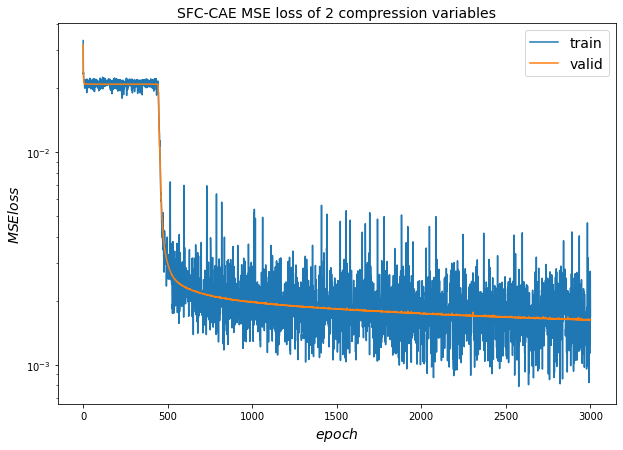

In [ ]:
pathName = "./SFC_CAE/csv/II_Eran3000_LV2_B16_n1600_L0.0001.csv"
name = "SFC-CAE MSE loss of 2 compression variables"
PlotMSELoss(pathName,name)

In [ ]:
# autoencoder = torch.load("./SFC_CAE/pkl/II_Eran3000_LV2_B16_n1600_L0.0001.pkl")

### Get mode

In [ ]:
# # pass training, validation and test data through the autoencoder
# mode_1train, training_decoded = autoencoder.to(device)(torch.tensor(training_data).to(device))
# train_error1 = (training_data[:,:,3:5] - training_decoded.cpu().detach().numpy())
# print("MSE_err of training data", (train_error1**2).mean())

# mode_1valid, valid_decoded = autoencoder.to(device)(torch.tensor(valid_data).to(device))
# valid_error1 = (valid_data[:, :, 3:5] - valid_decoded.cpu().detach().numpy())
# print("Mse_err of validation data", (valid_error1**2).mean())

# mode_1test, test_decoded = autoencoder.to(device)(torch.tensor(test_data).to(device))
# test_error1 = (test_data[:, :, 3:5]- test_decoded.cpu().detach().numpy())
# print("Mse_err of test data", (test_error1**2).mean())

# total_decoded = getTotal_decoded(training_decoded,valid_decoded,test_decoded,train_index,valid_index,test_index)
# total_error1 = (total_data[:, :, 3:5] - total_decoded)
# print("Mse_err of total data", (total_error1**2).mean())

# print(train_error1.shape)
# print(valid_error1.shape)
# print(test_error1.shape)
# print(total_error1.shape)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


MSE_err of training data 0.0017145680899187468
Mse_err of validation data 0.0016269243389898684
Mse_err of test data 0.0015190790391500098
Mse_err of total data 0.0016862548097489733
(1600, 20550, 2)
(200, 20550, 2)
(200, 20550, 2)
(2000, 20550, 2)


In [ ]:
# print(type(train_error1))
# print(type(training_decoded))
# print(type(total_error1))
# print(type(total_decoded))

<class 'numpy.ndarray'>
<class 'torch.Tensor'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
Latent_num = 2
torch.manual_seed(42)
BATCH_SIZE = 16
LR = 0.0001
nTrain = 1600

path_train_decoded = "./SAE/decoded_data/II_decoded_LV"+str(Latent_num)+"_Eran"+str(3000) + "_B"+str(BATCH_SIZE)+"_n"+ str(nTrain)+"_L"+str(LR)+"_train.pt"
path_valid_decoded = "./SAE/decoded_data/II_decoded_LV"+str(Latent_num)+"_Eran"+str(3000) + "_B"+str(BATCH_SIZE)+"_n"+ str(nTrain)+"_L"+str(LR)+"_valid.pt"
path_test_decoded = "./SAE/decoded_data/II_decoded_LV"+str(Latent_num)+"_Eran"+str(3000) + "_B"+str(BATCH_SIZE)+"_n"+ str(nTrain)+"_L"+str(LR)+"_test.pt"
path_total_decoded = "./SAE/decoded_data/II_decoded_LV"+str(Latent_num)+"_Eran"+str(3000) + "_B"+str(BATCH_SIZE)+"_n"+ str(nTrain)+"_L"+str(LR)+"_total.pt"
print(path_total_decoded)


path_train_error = "./SAE/Error_data/II_error_LV"+str(Latent_num)+"_Eran"+str(3000) + "_B"+str(BATCH_SIZE)+"_n"+ str(nTrain)+"_L"+str(LR)+"_train.pt"
path_valid_error = "./SAE/Error_data/II_error_LV"+str(Latent_num)+"_Eran"+str(3000) + "_B"+str(BATCH_SIZE)+"_n"+ str(nTrain)+"_L"+str(LR)+"_valid.pt"
path_test_error = "./SAE/Error_data/II_error_LV"+str(Latent_num)+"_Eran"+str(3000) + "_B"+str(BATCH_SIZE)+"_n"+ str(nTrain)+"_L"+str(LR)+"_test.pt"
path_total_error = "./SAE/Error_data/II_error_LV"+str(Latent_num)+"_Eran"+str(3000) + "_B"+str(BATCH_SIZE)+"_n"+ str(nTrain)+"_L"+str(LR)+"_total.pt"
print(path_total_error)


./SAE/decoded_data/II_decoded_LV2_Eran3000_B16_n1600_L0.0001_total.pt
./SAE/Error_data/II_error_LV2_Eran3000_B16_n1600_L0.0001_total.pt


In [ ]:
# torch.save(training_decoded, path_train_decoded)
# torch.save(valid_decoded, path_valid_decoded)
# torch.save(test_decoded, path_test_decoded)
# torch.save(total_decoded, path_total_decoded)


# torch.save(train_error1, path_train_error)
# torch.save(valid_error1, path_valid_error)
# torch.save(test_error1, path_test_error)
# torch.save(total_error1, path_total_error)

In [ ]:
training_decoded = torch.load(path_train_decoded)
valid_decoded = torch.load(path_valid_decoded)
test_decoded = torch.load(path_test_decoded)
total_decoded = torch.load(path_total_decoded)

train_error1 = torch.load(path_train_error)
valid_error1 = torch.load(path_valid_error)
test_error1 = torch.load(path_test_error)
total_error1 = torch.load(path_total_error)

print('training decoded shape: ',training_decoded.shape)
print('valid decoded shape: ',valid_decoded.shape)
print('test decoded shape: ',test_decoded.shape)
print('total decoded shape: ',total_decoded.shape)

print('train residual: ',train_error1.shape)
print('valid residual: ',valid_error1.shape)
print('test residual: ',test_error1.shape)
print('total residual: ',total_error1.shape)

print(test_decoded)

training decoded shape:  torch.Size([1600, 20550, 2])
valid decoded shape:  torch.Size([200, 20550, 2])
test decoded shape:  torch.Size([200, 20550, 2])
total decoded shape:  (2000, 20550, 2)
train residual:  (1600, 20550, 2)
valid residual:  (200, 20550, 2)
test residual:  (200, 20550, 2)
total residual:  (2000, 20550, 2)
tensor([[[0.2727, 0.0193],
         [0.2724, 0.0192],
         [0.2720, 0.0192],
         ...,
         [0.2800, 0.0214],
         [0.2815, 0.0198],
         [0.2833, 0.0212]],

        [[0.2712, 0.0192],
         [0.2709, 0.0191],
         [0.2704, 0.0191],
         ...,
         [0.2748, 0.0207],
         [0.2750, 0.0195],
         [0.2776, 0.0205]],

        [[0.2721, 0.0192],
         [0.2719, 0.0191],
         [0.2713, 0.0191],
         ...,
         [0.2758, 0.0205],
         [0.2765, 0.0195],
         [0.2789, 0.0204]],

        ...,

        [[0.2721, 0.0192],
         [0.2719, 0.0191],
         [0.2714, 0.0191],
         ...,
         [0.2768, 0.0205],
     

## Second network

### load data

In [ ]:
# add the SFC ordering to the residual data
training_error = np.zeros((nTrain,nNodes,5))
training_error[:,:,0] = training_data[:,:,0]
training_error[:,:,1] = training_data[:,:,1]
training_error[:,:,2] = training_data[:,:,2]
training_error[:,:,3] = train_error1[:,:,0]
training_error[:,:,4] = train_error1[:,:,1]


valid_error = np.zeros((nValid,nNodes,5))
valid_error[:,:,0] = valid_data[:,:,0]
valid_error[:,:,1] = valid_data[:,:,1]
valid_error[:,:,2] = valid_data[:,:,2]
valid_error[:,:,3] = valid_error1[:,:,0]
valid_error[:,:,4] = valid_error1[:,:,1]

test_error = np.zeros((nTest,nNodes,5))
test_error[:,:,0] = test_data[:,:,0]
test_error[:,:,1] = test_data[:,:,1]
test_error[:,:,2] = test_data[:,:,2]
test_error[:,:,3] = test_error1[:,:,0]
test_error[:,:,4] = test_error1[:,:,1]


total_error = np.zeros((nTrain+nValid+nTest,nNodes,5))
total_error[:,:,0] = total_data[:,:,0]
total_error[:,:,1] = total_data[:,:,1]
total_error[:,:,2] = total_data[:,:,2]
total_error[:,:,3] = total_error1[:,:,0]
total_error[:,:,4] = total_error1[:,:,1]


print('size train error', training_error.shape)
print('size valid error', valid_error.shape)
print('size test error', test_error.shape)
print('size total error', total_error.shape)

size train error (1600, 20550, 5)
size valid error (200, 20550, 5)
size test error (200, 20550, 5)
size total error (2000, 20550, 5)


### Network architecture

In [ ]:
# SFC-CAE: one curve with nearest neighbour smoothing and compressing to 4 latent variables
print("compress to 4")
torch.manual_seed(42)
# Hyper-parameters
Latent_num = 4
EPOCH = 3001
BATCH_SIZE = 16
LR = 0.0001
k = nNodes # number of nodes - this has to match training_data.shape[0]
print(training_error.shape) # nTrain by number of nodes by 5

# Data Loader for easy mini-batch return in training
# Residual as the input
train_loader = Data.DataLoader(dataset = training_error, batch_size =BATCH_SIZE , shuffle = True)

compress to 4
(1600, 20550, 5)


In [ ]:
class CNN_2(nn.Module):
    def __init__(self):
        super(CNN_2, self).__init__()
        self.encoder_h1 = nn.Sequential(
            # input shape (16,4,20550)   # The first 16 is the batch size
            nn.Tanh(),
            nn.Conv1d(4, 16, 32, 4, 16),
            # output shape (16, 16, 5138)
            nn.Tanh(),
            nn.Conv1d(16, 16, 32, 4, 16),
            # output shape (16, 16,1285)
            nn.Tanh(),
            nn.Conv1d(16, 16, 32, 4, 16),
            # output shape (16,16,322)
            nn.Tanh(),
            nn.Conv1d(16, 16, 32, 4, 16),
            # output shape (16,16,81)
            nn.Tanh(),
        )

        self.fc1 = nn.Sequential(
            nn.Linear(1296, 2),
            nn.Tanh(),
        )
        self.fc2 = nn.Sequential(
            nn.Linear(2, 16*81),
            nn.Tanh(),
        )
        self.decoder_h1 = nn.Sequential(
            # (b, 16, 81)
            nn.Tanh(),
            nn.ConvTranspose1d(16, 16, 32, 4, 15), # (16, 16, 322)
            nn.Tanh(),
            nn.ConvTranspose1d(16, 16, 32, 4, 15), # (16, 16, 1286)
            nn.Tanh(),
            nn.ConvTranspose1d(16, 16, 32, 4, 16), # (16, 16, 5140)
            nn.Tanh(),
            nn.ConvTranspose1d(16, 4, 32, 4, 19), # (16, 4, 20550)
            nn.Tanh(),
        )

        # input sparse layers, initialize weight as 0.33, bias as 0
        self.weight1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight1_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight1_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias1 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)
        self.weight11 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight11_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight11_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias11 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)
        self.weight2 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight2_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight2_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias2 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)
        self.weight22 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight22_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight22_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias22 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)
        self.weight3 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight3_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight3_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias3 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.zeros(k)),requires_grad = True)
        self.weight33 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight33_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight33_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias33 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.zeros(k)),requires_grad = True)
        self.weight4 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight4_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight4_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias4 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.zeros(k)),requires_grad = True)
        self.weight44 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight44_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight44_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias44 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.zeros(k)),requires_grad = True)
        
        # output sparse layers, initialize weight as 0.083, bias as 0
        self.weight_out1 = torch.nn.Parameter(torch.FloatTensor(0.083 *torch.ones(k)),requires_grad = True) 
        self.weight_out1_0 = torch.nn.Parameter(torch.FloatTensor(0.083* torch.ones(k)),requires_grad = True) 
        self.weight_out1_1 = torch.nn.Parameter(torch.FloatTensor(0.083* torch.ones(k)),requires_grad = True)
        
        self.weight_out11 = torch.nn.Parameter(torch.FloatTensor(0.083 *torch.ones(k)),requires_grad = True) 
        self.weight_out11_0 = torch.nn.Parameter(torch.FloatTensor(0.083* torch.ones(k)),requires_grad = True) 
        self.weight_out11_1 = torch.nn.Parameter(torch.FloatTensor(0.083* torch.ones(k)),requires_grad = True)
        
        self.weight_out2 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        self.weight_out2_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        self.weight_out2_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        
        self.weight_out22 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        self.weight_out22_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        self.weight_out22_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        
        self.weight_out3 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out3_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out3_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        
        self.weight_out33 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out33_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out33_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        
        self.weight_out4 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out4_0= torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out4_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        
        self.weight_out44 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out44_0= torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out44_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        
        self.bias_out1 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)
        self.bias_out2 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)


    def forward(self, x):
        # print("X_size",x.size())
        # first curve
        ToSFC1 = x[:, :, 0] # # The first column is the first SFC ordering
        ToSFC1Up = torch.zeros_like(ToSFC1)
        ToSFC1Down = torch.zeros_like(ToSFC1)
        ToSFC1Up[:-1] = ToSFC1[1:]
        ToSFC1Up[-1] = ToSFC1[-1]
        ToSFC1Down[1:] = ToSFC1[:-1]
        ToSFC1Down[0] = ToSFC1[0]

        batch_num = ToSFC1.shape[0]
        #print("ToSFC1",ToSFC1.shape) # (16, 20550)
        x1 = x[:, :, 3:5] # The fourth column and fifth column are velocities u and v respectively
        #print("x1", x1.shape) #        # (16, 20550, 2)
        x1_1d = torch.zeros((batch_num, 4, k)).to(device)
        # first input sparse layer, then transform to sfc order1
        for j in range(batch_num):
            x1_1d[j, 0, :] = x1[j, :, 0][ToSFC1[j].long()] * self.weight1 + \
                             x1[j, :, 0][ToSFC1Up[j].long()] * self.weight1_0 + \
                             x1[j, :, 0][ToSFC1Down[j].long()] * self.weight1_1 + self.bias1
        
            x1_1d[j, 1, :] = x1[j, :, 0][ToSFC1[j].long()] * self.weight11 + \
                             x1[j, :, 0][ToSFC1Up[j].long()] * self.weight11_0 + \
                             x1[j, :, 0][ToSFC1Down[j].long()] * self.weight11_1 + self.bias11

            x1_1d[j, 2, :] = x1[j, :, 1][ToSFC1[j].long()] * self.weight2 + \
                             x1[j, :, 1][ToSFC1Up[j].long()] * self.weight2_0 + \
                             x1[j, :, 1][ToSFC1Down[j].long()] * self.weight2_1 + self.bias2

            x1_1d[j, 3, :] = x1[j, :, 1][ToSFC1[j].long()] * self.weight22 + \
                             x1[j, :, 1][ToSFC1Up[j].long()] * self.weight22_0 + \
                             x1[j, :, 1][ToSFC1Down[j].long()] * self.weight22_1 + self.bias22

        # first cnn encoder
        encoded_1 = self.encoder_h1(x1_1d.view(-1, 4, k)) #(16,4,20550)
        # print("encoded", encoded_1.shape)
        # flatten and concatenate
        encoded_3 = encoded_1.view(-1,16*81)
        # print("Before FC", encoded_3.shape)
        # fully connection
        encoded = self.fc1(encoded_3) # (b,128)
        # print("After encoder FC，the output of encoder",encoded.shape)     
        
        
        # print("encoded_combine",encoded.shape)
        decoded_3 = self.decoder_h1(self.fc2(encoded).view(-1, 16, 81))
        # print("The output of decoder: ", decoded_3.shape) # (16, 2, 20550)
        BackSFC1 = torch.argsort(ToSFC1)
        BackSFC1Up = torch.argsort(ToSFC1Up)
        BackSFC1Down = torch.argsort(ToSFC1Down)

        # k = 20550
        # batch_num = ToSFC1.shape[0]
        decoded_sp = torch.zeros((batch_num, k, 2)).to(device)
        # output sparse layer, resort according to sfc transform
        for j in range(batch_num):
            decoded_sp[j, :, 0] = decoded_3[j, 0, :][BackSFC1[j].long()]* self.weight_out1 + \
                                  decoded_3[j, 0, :][BackSFC1Up[j].long()] * self.weight_out1_0 + \
                                  decoded_3[j, 0, :][BackSFC1Down[j].long()] * self.weight_out1_1 + \
                                  decoded_3[j, 1, :][BackSFC1[j].long()]* self.weight_out11 + \
                                  decoded_3[j, 1, :][BackSFC1Up[j].long()] * self.weight_out11_0 + \
                                  decoded_3[j, 1, :][BackSFC1Down[j].long()] * self.weight_out11_1 + self.bias_out1

            decoded_sp[j, :, 1] = decoded_3[j, 2, :][BackSFC1[j].long()] * self.weight_out3 + \
                                  decoded_3[j, 2, :][BackSFC1Up[j].long()] * self.weight_out3_0 + \
                                  decoded_3[j, 2, :][BackSFC1Down[j].long()] * self.weight_out3_1 + \
                                  decoded_3[j, 3, :][BackSFC1[j].long()] * self.weight_out33 + \
                                  decoded_3[j, 3, :][BackSFC1Up[j].long()] * self.weight_out33_0 + \
                                  decoded_3[j, 3, :][BackSFC1Down[j].long()] * self.weight_out33_1 + self.bias_out2       
        # resort 1D to 2D
        decoded = F.tanh(decoded_sp) # both are BATCH_SIZE by nNodes by 2
        return encoded, decoded

### Train

In [ ]:
# train the autoencoder

t_train_0 = time.time()
autoencoder_2 = CNN_2().to(device)
optimizer = torch.optim.Adam(autoencoder_2.parameters(), lr=LR)
loss_func = nn.MSELoss()

loss_list = []
loss_valid = []
epoch_list=[]

for epoch in range(EPOCH):
    for step, x in enumerate(train_loader):
        b_y = x[:, :, 3:5].to(device)   # b_y= False
        b_x = x.to(device)    # b_x: False
        
        # print("b_mode",b_mode.requires_grad)
        encoded, decoded = autoencoder_2(b_x.float())   #decoded true
        # decoded.detach_()
        # decoded = decoded.detach()
      
        loss = loss_func(decoded, b_y.float()) # Loss: True       # mean square error
        optimizer.zero_grad()                  # clear gradients for this training step
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()                     # apply gradients

    loss_list.append(loss)

    encoded, decoded = autoencoder_2(torch.tensor(valid_error).to(device))
    error_autoencoder_2 = (decoded.detach() - torch.tensor(valid_error[:,:, 3:5]).to(device))
    MSE_valid = (error_autoencoder_2**2).mean()
    loss_valid.append(MSE_valid)
    epoch_list.append(epoch)
    print('Epoch: ', epoch, '| train loss: %.6f' % loss.cpu().data.numpy(), '| valid loss: %.6f' % MSE_valid)

    #save the weights every 500 epochs 
    if (epoch%500 == 0):
        torch.save(autoencoder_2, "./SAE/pkl/II_I_Error"+str(epoch) +"_LV"+str(Latent_num)+ "_B"+str(BATCH_SIZE)+"_n"+ str(nTrain)+"_L"+str(LR)+".pkl")
        pathcsv= "./SAE/csv/II_I_Error"+str(epoch)+"_LV"+str(Latent_num) + "_B"+str(BATCH_SIZE)+"_n"+ str(nTrain)+"_L"+str(LR)+".csv"
        saveCsv(pathcsv,epoch+1)

t_train_1 = time.time()
# torch.save(autoencoder_2, path)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch:  0 | train loss: 0.001533 | valid loss: 0.001624
Epoch:  1 | train loss: 0.001838 | valid loss: 0.001622
Epoch:  2 | train loss: 0.001926 | valid loss: 0.001622
Epoch:  3 | train loss: 0.001062 | valid loss: 0.001621
Epoch:  4 | train loss: 0.001839 | valid loss: 0.001598
Epoch:  5 | train loss: 0.001561 | valid loss: 0.001549
Epoch:  6 | train loss: 0.000996 | valid loss: 0.001503
Epoch:  7 | train loss: 0.001335 | valid loss: 0.001475
Epoch:  8 | train loss: 0.001422 | valid loss: 0.001454
Epoch:  9 | train loss: 0.001789 | valid loss: 0.001437
Epoch:  10 | train loss: 0.001431 | valid loss: 0.001426
Epoch:  11 | train loss: 0.000743 | valid loss: 0.001416
Epoch:  12 | train loss: 0.001743 | valid loss: 0.001407
Epoch:  13 | train loss: 0.001899 | valid loss: 0.001401
Epoch:  14 | train loss: 0.001286 | valid loss: 0.001394
Epoch:  15 | train loss: 0.001043 | valid loss: 0.001388
Epoch:  16 | train loss: 0.001077 | valid loss: 0.001383
Epoch:  17 | train loss: 0.000891 | valid

In [ ]:
print(t_train_1-t_train_0)   # 3000

33099.28348207474


### Save loss and plot

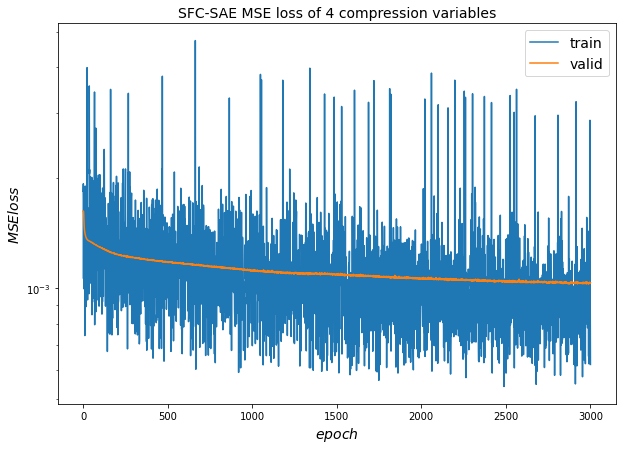

In [ ]:
pathName = "./SAE/csv/II_I_Error3000_LV4_B16_n1600_L0.0001.csv"
name = "SFC-SAE MSE loss of 4 compression variables"
PlotMSELoss(pathName,name)

In [ ]:
autoencoder_2 = torch.load("./SAE/pkl/II_I_Error3000_LV4_B16_n1600_L0.0001.pkl")

### Get mode

In [ ]:
# pass training, validation and test data through the autoencoder
t_predict_0 = time.time()

mode_2train, training_decoded2 = autoencoder_2.to(device)(torch.tensor(training_error).to(device))
train_error2 = (training_decoded2.cpu().detach().numpy() - training_error[:,:,3:5])
print("MSE_err of training data", (train_error2**2).mean())

mode_2valid, valid_decoded2 = autoencoder_2.to(device)(torch.tensor(valid_error).to(device))
valid_error2 = (valid_decoded2.cpu().detach().numpy() - valid_error[:, :, 3:5])
print("Mse_err of validation data", (valid_error2**2).mean())

mode_2test, test_decoded2 = autoencoder_2.to(device)(torch.tensor(test_error).to(device))
test_error2 = (test_decoded2.cpu().detach().numpy() - test_error[:, :, 3:5])
print("Mse_err of test data", (test_error2**2).mean())
t_predict_1 = time.time()

total_decoded2 = getTotal_decoded(training_decoded2,valid_decoded2,test_decoded2,train_index,valid_index,test_index)
total_error2 = (total_decoded2 - total_error[:, :, 3:5])
print("Mse_err of total data", (total_error2**2).mean())

print(mode_2train.shape)
print(mode_2valid.shape)
print(mode_2test.shape)
print("Prediction time2: ",t_predict_1-t_predict_0)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


MSE_err of training data 0.0009525349450092002
Mse_err of validation data 0.0010357036094973857
Mse_err of test data 0.0009900677932211193
Mse_err of total data 0.0009646050962792067
torch.Size([1600, 2])
torch.Size([200, 2])
torch.Size([200, 2])
Prediction time2:  5.728928327560425


In [ ]:
# Combine the output of the first and second network
t_predict_2 = time.time()
training_pre = training_decoded.cpu().detach().numpy()+  training_decoded2.cpu().detach().numpy()
test_pre = test_decoded.cpu().detach().numpy()+  test_decoded2.cpu().detach().numpy()
valid_pre = valid_decoded.cpu().detach().numpy()+  valid_decoded2.cpu().detach().numpy()
t_predict_3 = time.time()
total_pre = total_decoded+  total_decoded2
print("Prection time: ",t_predict_3-t_predict_2+t_predict_1-t_predict_0)

Prection time:  6.124452114105225


In [ ]:
train_error_autoencoder2 = (training_pre - training_data[:,:,3:5])
print("MSE_err of training data", (train_error_autoencoder2**2).mean())

valid_error_autoencoder2 = (valid_pre - valid_data[:,:,3:5])
print("MSE_err of valid data", (valid_error_autoencoder2**2).mean())

test_error_autoencoder2 = (test_pre - test_data[:,:,3:5])
print("MSE_err of test data", (test_error_autoencoder2**2).mean())

total_error_autoencoder2 = (total_pre - total_data[:,:,3:5])
print("MSE_err of total data", (total_error_autoencoder2**2).mean())

MSE_err of training data 0.0009525349450192064
MSE_err of valid data 0.0010357036095587748
MSE_err of test data 0.000990067793106062
MSE_err of total data 0.0009646050962792067


### Convert csv to vtu

In [ ]:
# Before convert csv file to vtu file, the range of data must be recovered
training_pre[:, :, 0] = (training_pre[:, :, 0] - bu)/ku
valid_pre[:, :, 0] = (valid_pre[:, :, 0] - bu)/ku
test_pre[:, :, 0] = (test_pre[:, :, 0] - bu)/ku
total_pre[:, :, 0] = (total_pre[:, :, 0] - bu)/ku

training_pre[:, :, 1] = (training_pre[:, :, 1] - bv)/kv
valid_pre[:, :, 1] = (valid_pre[:, :, 1] - bv)/kv
test_pre[:, :, 1] = (test_pre[:, :, 1] - bv)/kv
total_pre[:, :, 1] = (total_pre[:, :, 1] - bv)/kv


training_data[:, :, 3] = (training_data[:, :, 3] - bu)/ku
valid_data[:, :, 3] = (valid_data[:, :, 3] - bu)/ku
test_data[:, :, 3] = (test_data[:, :, 3] - bu)/ku
total_data[:, :, 3] = (total_data[:, :, 3] - bu)/ku

training_data[:, :, 4] = (training_data[:, :, 4] - bv)/kv
valid_data[:, :, 4] = (valid_data[:, :, 4] - bv)/kv
test_data[:, :, 4] = (test_data[:, :, 4] - bv)/kv
total_data[:, :, 4] = (total_data[:, :, 4] - bv)/kv

In [ ]:
#results = np.concatenate((training_decoded_2.cpu().data.numpy(), valid_decoded_2.cpu().data.numpy(), test_decoded_2.cpu().data.numpy()))
results = total_pre
print('results shape', results.shape)
N = results.shape[1] * results.shape[2]
results = results.reshape((results.shape[0],N), order='F')
print('results shape', results.shape, type(results))
# The path can be defined by user depending on the requirements
path = "./SAE/All_results/SAE_II_I"+"_LV"+str(Latent_num) + "_B"+str(BATCH_SIZE)+'E_'+str(3000)+"_result.csv"
## write results to file
np.savetxt(path, results , delimiter=',')

results shape (2000, 20550, 2)
results shape (2000, 41100) <class 'numpy.ndarray'>
